In [12]:
!pip install pot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.7/901.7 kB 45.5 MB/s eta 0:00:00


In [ ]:
#Import
import numpy as np
import matplotlib.pyplot as plt
import ot

In [ ]:
# Parameters
d = 3
N = 10000

# Moyennes et covariance pour les gaussiennes tronquées
mean_p = np.array([0.3] * d)
mean_q = np.array([0.7] * d)
cov = 0.02 * np.eye(d)

In [ ]:
#Construction des mesures
p_samples = []
q_samples = []

while len(p_samples) < N:
    x = np.random.multivariate_normal(mean_p, cov)
    if np.all((x >= 0) & (x <= 1)):
        p_samples.append(x)

while len(q_samples) < N:
    x = np.random.multivariate_normal(mean_q, cov)
    if np.all((x >= 0) & (x <= 1)):
        q_samples.append(x)
        
p_samples = np.array(p_samples)
q_samples = np.array(q_samples)

In [32]:
# Distance de Wasserstein exacte avec POT
M = ot.dist(p_samples, q_samples)
a = b = np.ones(N) / N
W1 = ot.emd2(a, b, M)

print(W1)

0.46323944567470493


/usr/local/lib/python3.12/site-packages/ot/lp/__init__.py:630: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  check_result(result_code)


In [ ]:
# Approximation dyadique
def dyadic_w1(p, q, eps, max_power=5):
    m = int(np.ceil(np.log2(2 * d / eps)))
    W1 = 0
    for i in range(1, m + 1):
        bins = [np.linspace(0, 1, 2**i + 1) for i in range(d)]

        p_hist, _ = np.histogramdd(p, bins=bins)
        q_hist, _ = np.histogramdd(q, bins=bins)

        p_hist = p_hist / p_hist.sum()
        q_hist = q_hist / q_hist.sum()

        l1 = np.sum(np.abs(p_hist - q_hist))

        W1 += (1 / 2**i) * l1
    return 2 * d * W1 + eps / 2

[np.float64(10.683349999999999), np.float64(10.657297368421052), np.float64(10.631244736842104), np.float64(10.605192105263157), np.float64(10.57913947368421), np.float64(11.295286842105261), np.float64(11.269234210526314), np.float64(11.243181578947366), np.float64(11.217128947368419), np.float64(11.191076315789472), np.float64(11.165023684210524), np.float64(11.138971052631577), np.float64(11.486568421052631), np.float64(11.460515789473684), np.float64(11.434463157894736), np.float64(11.40841052631579), np.float64(11.382357894736842), np.float64(11.356305263157894), np.float64(11.330252631578947), np.float64(11.3042)]


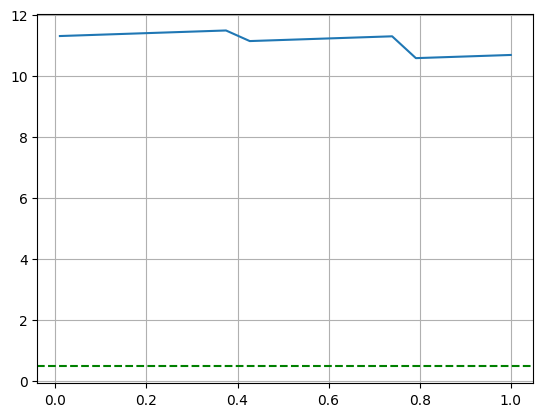

In [36]:
# Répartition linéaire des epsilons

eps_values = np.linspace(1, 0.01, 20)

dyadic_estimates = [dyadic_w1(p_samples, q_samples, eps) for eps in eps_values]
print (dyadic_estimates)


plt.plot(eps_values, dyadic_estimates)
plt.axhline(W1_true, color='green', linestyle='--')
plt.grid(True)
plt.show()

[np.float64(11.3492), np.float64(11.3042), np.float64(11.2997), np.float64(11.299249999999999), np.float64(11.299204999999999), np.float64(11.2992005), np.float64(11.29920005), np.float64(11.299200005)]


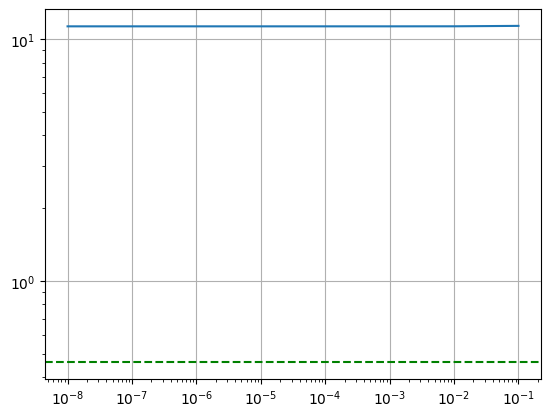

In [37]:
# Répartition exponentielle des epsilons

eps_values = [10**(-i) for i in range(1, 9)]

dyadic_estimates = [dyadic_w1(p_samples, q_samples, eps) for eps in eps_values]
print (dyadic_estimates)


plt.loglog(eps_values, dyadic_estimates)
plt.axhline(W1_true, color='green', linestyle='--')
plt.grid(True)
plt.show()